#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.add(Dropout(rate=0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [24]:
train_history_cc = model.fit(x_img_train_normalize, y_label_train_OneHot,
                             validation_split=0.25,
                             epochs=12, batch_size=128, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 33s 884us/step - loss: 2.1651 - acc: 0.1982 - val_loss: 2.0518 - val_acc: 0.2962
Epoch 2/12
37500/37500 [==============================] - 12s 316us/step - loss: 1.9551 - acc: 0.2958 - val_loss: 1.9351 - val_acc: 0.3458
Epoch 3/12
37500/37500 [==============================] - 12s 317us/step - loss: 1.8340 - acc: 0.3471 - val_loss: 1.8417 - val_acc: 0.3820
Epoch 4/12
37500/37500 [==============================] - 12s 316us/step - loss: 1.7305 - acc: 0.3815 - val_loss: 1.7489 - val_acc: 0.4172
Epoch 5/12
37500/37500 [==============================] - 12s 317us/step - loss: 1.6498 - acc: 0.4098 - val_loss: 1.6809 - val_acc: 0.4388
Epoch 6/12
37500/37500 [==============================] - 12s 318us/step - loss: 1.5856 - acc: 0.4316 - val_loss: 1.6514 - val_acc: 0.4490
Epoch 7/12
37500/37500 [==============================] - 12s 317us/

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_train_history(train_history, train_acc, test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

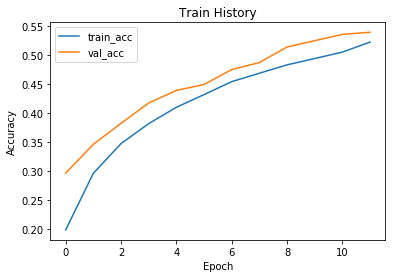

In [26]:
show_train_history(train_history_cc, 'acc', 'val_acc')

In [27]:
model.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])

In [28]:
train_history_MSE = model.fit(x_img_train_normalize, y_label_train_OneHot,
                              validation_split=0.25,
                              epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 15s 393us/step - loss: 0.0653 - acc: 0.4897 - val_loss: 0.0594 - val_acc: 0.5854
Epoch 2/12
37500/37500 [==============================] - 14s 366us/step - loss: 0.0528 - acc: 0.6010 - val_loss: 0.0518 - val_acc: 0.6383
Epoch 3/12
37500/37500 [==============================] - 14s 367us/step - loss: 0.0468 - acc: 0.6540 - val_loss: 0.0481 - val_acc: 0.6596
Epoch 4/12
37500/37500 [==============================] - 14s 367us/step - loss: 0.0424 - acc: 0.6907 - val_loss: 0.0459 - val_acc: 0.6855
Epoch 5/12
37500/37500 [==============================] - 14s 368us/step - loss: 0.0383 - acc: 0.7238 - val_loss: 0.0424 - val_acc: 0.7003
Epoch 6/12
37500/37500 [==============================] - 14s 369us/step - loss: 0.0345 - acc: 0.7541 - val_loss: 0.0410 - val_acc: 0.7136
Epoch 7/12
37500/37500 [==============================] - 14s 367us/step - loss: 0.0312 - acc: 0.7806 - val_loss: 0.

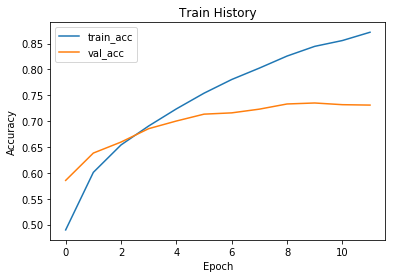

In [29]:
show_train_history(train_history_MSE, 'acc', 'val_acc')

In [30]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [31]:
train_history_bc = model.fit(x_img_train_normalize, y_label_train_OneHot,
                             validation_split=0.25,
                             epochs=12, batch_size=128, verbose=1)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 15s 403us/step - loss: 0.0670 - acc: 0.9779 - val_loss: 0.1252 - val_acc: 0.9523
Epoch 2/12
37500/37500 [==============================] - 14s 371us/step - loss: 0.0583 - acc: 0.9804 - val_loss: 0.1232 - val_acc: 0.9531
Epoch 3/12
37500/37500 [==============================] - 14s 372us/step - loss: 0.0502 - acc: 0.9829 - val_loss: 0.1248 - val_acc: 0.9519
Epoch 4/12
37500/37500 [==============================] - 14s 372us/step - loss: 0.0450 - acc: 0.9842 - val_loss: 0.1256 - val_acc: 0.9530
Epoch 5/12
37500/37500 [==============================] - 14s 373us/step - loss: 0.0408 - acc: 0.9858 - val_loss: 0.1248 - val_acc: 0.9528
Epoch 6/12
37500/37500 [==============================] - 14s 373us/step - loss: 0.0368 - acc: 0.9868 - val_loss: 0.1277 - val_acc: 0.9527
Epoch 7/12
37500/37500 [==============================] - 14s 372us/step - loss: 0.0338 - acc: 0.9879 - val_loss: 0.

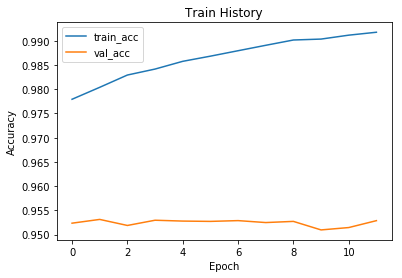

In [32]:
show_train_history(train_history_bc, 'acc', 'val_acc')